### Data from the Diagnostic Imaging Requisition database was extracted into 3 separate tables on 3 CSV files. Combining these files into a single table

In [2]:
import pandas as pd
df1 = pd.read_csv('DI - Visits 1.3.csv')
df2 = pd.read_csv('DI - Visits 2.3.csv')
df3 = pd.read_csv('DI - Visits 3.3.csv')
df = pd.concat([df1, df2, df3], axis = 0, ignore_index = True)
df = df.drop(columns = ['Unnamed: 6', 'Unnamed: 7'], axis = 1)
df = df.dropna(how = 'all')
df.to_csv("merged_data.csv", index=False)
df

,HCID,Pt Age,DI Req - Time,Requesting Physician,Req Type - Abdominal,DI - Pt in Suite
0,2203144.0,70.0,2019-01-21 15:27,Dr. S,ABD,2019-01-21 16:42
1,2461112.0,67.0,2019-01-21 15:27,Dr. S,ABD,2019-01-21 18:43
2,2233815.0,58.0,2019-01-21 15:43,Dr. S,ABD,2019-01-21 15:55
3,1043375.0,31.0,2019-01-22 01:19,Dr. S,ABD,2019-01-22 02:53
4,2933761.0,60.0,2019-01-22 02:20,Dr. O,ABD,2019-01-22 03:41
...,...,...,...,...,...,...
2452,2738163.0,51.0,2021-02-05 21:27:03,Dr. P,ABD,2021-02-06 1:13:43
2453,2474946.0,62.0,2021-02-05 21:41:36,Dr. J,ABD,2021-02-06 1:18:49
2454,2793708.0,69.0,2021-02-05 21:41:36,Dr. J,ABD,2021-02-06 0:21:20
2455,2398214.0,30.0,2021-02-05 23:37:13,Dr. D,ABD,2021-02-06 0:05:22


### Using the Operating Room Booking data to determine which records from Diagnostic Imaging database were from patients who were in the care pathway for an Appendectomy or Cholecystectomy.

In [3]:
import numpy as np
# Load the DI data into a Pandas dataframe
df_DI = pd.read_csv('merged_data.csv')

# Load the OR Booking data into a Pandas dataframe
df_OR = pd.read_csv('OR_booking_Mod.csv')

# Merge the DI and OR Booking data on a common identifier (e.g., Patient ID)
#merged_data = pd.merge(df_DI, df_OR, on = 'HCID ',how = 'inner' )
merged_data = pd.merge(df_DI, df_OR, left_on='HCID', right_on='HCID ', how='inner')

# Filter the merged data to only include records with Appendectomy or Cholecystectomy
filtered_data = merged_data[merged_data['Proc Descr Mod'].isin(['Laparoscopy Appendectomy','Laparoscopy Cholecystectomy'])]
filtered_data  = filtered_data.drop(columns = ['HCID ', 'Pt Age_y'], axis = 1)
filtered_data = filtered_data[filtered_data['Proc Descr Mod'].notna()]
filtered_data.to_excel('filtered_data.xlsx')
filtered_data

,HCID,Pt Age_x,DI Req - Time,Requesting Physician,Req Type - Abdominal,DI - Pt in Suite,Proc Descr Mod,Req Proc Tm,Pt Priority,OR Booking Req DT/Tm,...,Pt OR Chk In,Pt In OR,OR,Pt Trns,ORR#,Surgery_By,Proc_DateTime,Performance,Measure,Wait_SugeryStart
0,2233815.0,58.0,2019-01-21 15:43,Dr. S,ABD,2019-01-21 15:55,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2019-01-21 17:12:00,...,18:27,19:05,5,PARU,1065535,2019-01-22 17:12:00,2019-01-21 19:05:00,0 days 01:53:00,Early,-1 days +01:53:00
1,1043375.0,31.0,2019-01-22 01:19,Dr. S,ABD,2019-01-22 02:53,Laparoscopy Appendectomy,60,0 days 06:00:00,2019-01-22 03:30:00,...,07:50,08:00,5,PARU,1065583,2019-01-22 09:30:00,2019-01-22 08:00:00,0 days 04:30:00,Early,-1 days +22:30:00
2,2616633.0,46.0,2019-01-30 03:25,Dr. O,ABD,2019-01-30 04:59,Laparoscopy Appendectomy,,0 days 06:00:00,2019-01-30 05:30:00,...,07:40,08:00,10,PARU,1065660,2019-01-30 11:30:00,2019-01-30 08:00:00,0 days 02:30:00,Early,-1 days +20:30:00
3,1500970.0,69.0,2019-02-08 23:15,Dr. D,ABD,2019-02-09 00:44,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2019-02-09 01:00:00,...,13:25,13:35,8,PARU,1065741,2019-02-10 01:00:00,2019-02-11 13:35:00,2 days 12:35:00,Delay,1 days 12:35:00
4,1642088.0,51.0,2019-02-24 18:11,Dr. S,ABD,2019-02-24 20:35,Laparoscopy Appendectomy,60,0 days 06:00:00,2019-02-24 21:28:00,...,01:55,02:20,9,PARU,1065891,2019-02-25 03:28:00,2019-02-25 02:20:00,0 days 04:52:00,Early,-1 days +22:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1867742.0,27.0,2020-12-15 13:36:55,Dr. J,ABD,2020-12-15 14:02:59,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2020-12-15 15:25:00,...,18:47,19:08,9,PARU,1100529,2020-12-16 15:25:00,2020-12-15 19:08:00,0 days 03:43:00,Early,-1 days +03:43:00
727,2926283.0,39.0,2020-12-21 13:55:52,Dr. D,ABD,2020-12-21 17:01:31,Laparoscopy Cholecystectomy,60,1 days 00:00:00,2020-12-21 17:30:00,...,21:01,21:30,5,PARU,1100597,2020-12-22 17:30:00,2020-12-22 21:30:00,1 days 04:00:00,Delay,0 days 04:00:00
728,1212201.0,56.0,2020-12-30 7:43:19,Dr. J,ABD,2020-12-30 8:46:18,Laparoscopy Cholecystectomy,60,1 days 12:00:00,2020-12-30 10:25:00,...,18:30,19:17,5,PARU,1100635,2020-12-31 22:25:00,2021-01-01 19:17:00,2 days 08:52:00,Delay,0 days 20:52:00
729,1866669.0,30.0,2021-01-08 18:07:33,Dr. P,ABD,2021-01-08 18:18:20,Laparoscopy Cholecystectomy,60,1 days 12:00:00,2021-01-08 18:43:00,...,13:38,14:13,9,PARU,1100749,2021-01-10 06:43:00,2021-01-10 14:13:00,1 days 19:30:00,Delay,0 days 07:30:00


### Percentage of Appendectomy patients going through DI on their pathway to the OR

In [4]:
appendectomy_data_DI = filtered_data[filtered_data['Proc Descr Mod'] == 'Laparoscopy Appendectomy']
appendectomy_data_total =  df_OR[df_OR['Proc Descr Mod'] == 'Laparoscopy Appendectomy']
percentage = ((len(appendectomy_data_DI) / len(appendectomy_data_total)) * 100)
print("Percentage of Appendectomy patients going through DI:", percentage, "%")

Percentage of Appendectomy patients going through DI: 33.56401384083045 %


### Percentage of Cholecystectomy patients going through DI on their pathway to the OR

In [5]:
Cholecystectomy_data_DI = filtered_data[filtered_data['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy']
Cholecystectomy_data_total = df_OR[df_OR['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy']
percentage = (len(Cholecystectomy_data_DI) / len(Cholecystectomy_data_total)) * 100
print("Percentage of Cholecystectomy patients going through DI:", percentage, "%")

Percentage of Cholecystectomy patients going through DI: 82.48847926267281 %


In [5]:
filtered_data = filtered_data.dropna(subset=['Proc Descr Mod'])
filtered_data['Pt Age_x'].value_counts()

62.0    19
41.0    19
46.0    17
50.0    17
37.0    17
        ..
96.0     1
92.0     1
87.0     1
98.0     1
85.0     1
Name: Pt Age_x, Length: 77, dtype: int64

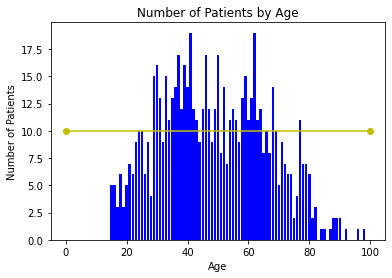

In [12]:
import matplotlib.pyplot as plt

filtered_data = filtered_data.dropna(subset=['Proc Descr Mod'])
age_counts = filtered_data['Pt Age_x'].value_counts()

plt.bar(age_counts.index, age_counts.values, color = 'b')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Age')

x1, y1 = [0, 100], [10,10]
plt.plot(x1, y1, marker = 'o',color = 'y')

plt.show()

### The data suggest that,  it is highly probable for patients within the age range of 30 to 70 to undergo diagnostic imaging procedures prior to their operation using close to 10 number of patients in that age. The aforementioned findings highlight the potential association between age and the clinical decision-making process in selecting the most appropriate diagnostic procedures for surgical candidates. Further research may be necessary to investigate the underlying factors that may influence the selection of diagnostic imaging in these patient groups, and to inform clinical guidelines for improved preoperative care.

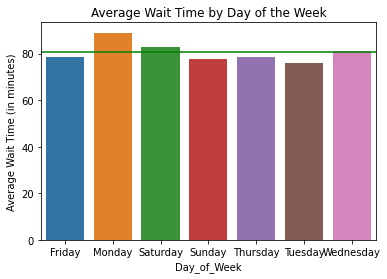

Average wait time is 80.84787961696314


Day_of_Week
Friday       78.637993
Monday       88.956780
Saturday     82.698949
Sunday       77.608163
Thursday     78.667273
Tuesday      75.880588
Wednesday    81.044253
Name: Wait_time, dtype: float64

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

# Extract the day of the week from the date column
filtered_data['Day_of_Week'] = pd.to_datetime(filtered_data['DI Req - Time']).dt.dayofweek
filtered_data = filtered_data[pd.to_datetime(filtered_data['DI Req - Time'], errors='raise').notna()]

# Map the integer values to the corresponding day of the week
filtered_data['Day_of_Week'] = filtered_data['Day_of_Week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

filtered_data['DI Req - Time']= pd.to_datetime(filtered_data['DI Req - Time'])
filtered_data['DI - Pt in Suite']= pd.to_datetime(filtered_data['DI - Pt in Suite'])
filtered_data['Wait_time'] = filtered_data['DI - Pt in Suite'] - filtered_data['DI Req - Time']
average_wait_time = filtered_data["Wait_time"].mean()

# Convert the wait time column to minutes
filtered_data['Wait_time'] = filtered_data['Wait_time'].dt.total_seconds() / 60

# Calculate the average wait time for all patients
average_wait_time = filtered_data["Wait_time"].mean()

# Group the data by day of the week and calculate the average wait time for each group
grouped_data = filtered_data.groupby('Day_of_Week').mean()

# Create a bar plot to compare the average wait time for each day of the week to the overall average wait time
sns.barplot(x=grouped_data.index, y='Wait_time', data=grouped_data)
plt.axhline(y=average_wait_time, color='g', linestyle='-')
plt.ylabel('Average Wait Time (in minutes)')
plt.title('Average Wait Time by Day of the Week')

# Show the plot
plt.show()
print('Average wait time is', average_wait_time)
grouped_data['Wait_time']



### The average waiting time to be seen by DI for Appendectomy or Cholecystectomy patients is the highest on  Monday and lowest on Tuesday. Saturdays and Wednesdays also have higher than average wait times. 

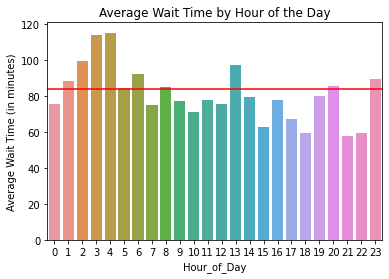

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

#Filter the data to only include Appendectomy and Cholecystectomy patients
filtered_data = filtered_data[(filtered_data['Proc Descr Mod'] == 'Laparoscopy Appendectomy') | (filtered_data['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy')]

#Extract the hour of the day from the date column
filtered_data['Hour_of_Day'] = pd.to_datetime(filtered_data['DI Req - Time']).dt.hour
filtered_data = filtered_data[pd.to_datetime(filtered_data['DI Req - Time'], errors='coerce').notna()]

filtered_data['DI Req - Time']= pd.to_datetime(filtered_data['DI Req - Time'])
filtered_data['DI - Pt in Suite']= pd.to_datetime(filtered_data['DI - Pt in Suite'])
filtered_data['Wait_time'] = filtered_data['DI - Pt in Suite'] - filtered_data['DI Req - Time']
average_wait_time = filtered_data.groupby(by=["Proc Descr Mod"])["Wait_time"].mean()

#Convert the wait time column to minutes
filtered_data['Wait_time'] = filtered_data['Wait_time'].dt.total_seconds() / 60

#Calculate the average wait time for all patients
average_wait_time = filtered_data.groupby(by=["Proc Descr Mod"])["Wait_time"].mean()

#Group the data by hour of the day and calculate the average wait time for each group
grouped_data = filtered_data.groupby('Hour_of_Day').mean()

#Create a bar plot to compare the average wait time for each hour of the day to the overall average wait time
sns.barplot(x=grouped_data.index, y='Wait_time', data=grouped_data)
plt.axhline(y=average_wait_time.mean(), color='r', linestyle='-')
plt.ylabel('Average Wait Time (in minutes)')
plt.title('Average Wait Time by Hour of the Day')

#Show the plot
plt.show()

### The data presented in the graph reveals a sharp rise in the average waiting time to be seen by DI unit, starting at 12 midnight and peaking at 4am. There is continuous decrease until noon. This could be as a result of limited  operational capacity of the DI unit during night shifts. Afterward, there is another peak at 1pm where the waiting time increases. The lowest waiting time can be observed at 9 and 10 pm.

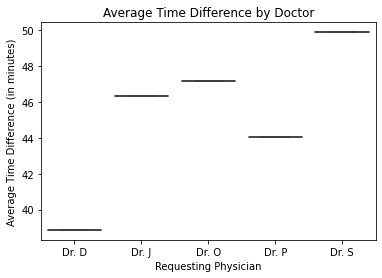

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

# Filter the data to only include Appendectomy and Cholecystectomy patients
filtered_data = filtered_data[(filtered_data['Proc Descr Mod'] == 'Laparoscopy Appendectomy') | (filtered_data['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy')]

# Calculate the time difference between the patient being seen by DI and the time a patient is booked into the OR
filtered_data['Time_Difference'] = pd.to_datetime(filtered_data['OR Booking Req DT/Tm']) - pd.to_datetime(filtered_data['DI - Pt in Suite'])
#filtered_data = filtered_data[pd.to_datetime(filtered_data['Time_Difference'], errors='coerce').notna()]

# Convert the time difference column to minutes
filtered_data['Time_Difference'] = filtered_data['Time_Difference'].dt.total_seconds() / 60
# Group the data by doctor and calculate the average time difference for each group
grouped_data = filtered_data.groupby(by=["Requesting Physician"])["Time_Difference"].mean()

# Plot the average time difference for each doctor
sns.boxplot(x=grouped_data.index, y=grouped_data.values)
plt.ylabel('Average Time Difference (in minutes)')
plt.title('Average Time Difference by Doctor')

# Show the plot
plt.show()

## Sometimes data can be used to find quality improvement opportunities. On the premise that, the time difference between the patient being seen by DI (DI ‐ Pt in Suite) and the time a patient is booked into the OR (OR Booking Req DT/Tm) is reflective of a doctor’s ability to manage their workload.

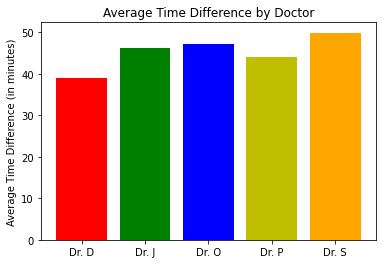

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

# Filter the data to only include Appendectomy and Cholecystectomy patients
filtered_data = filtered_data[(filtered_data['Proc Descr Mod'] == 'Laparoscopy Appendectomy') | (filtered_data['Proc Descr Mod'] == 'Laparoscopy Cholecystectomy')]

# Calculate the time difference between the patient being seen by DI and the time a patient is booked into the OR
filtered_data['Time_Difference'] = pd.to_datetime(filtered_data['OR Booking Req DT/Tm']) - pd.to_datetime(filtered_data['DI - Pt in Suite'])
#filtered_data = filtered_data[pd.to_datetime(filtered_data['Time_Difference'], errors='coerce').notna()]

# Convert the time difference column to minutes
filtered_data['Time_Difference'] = filtered_data['Time_Difference'].dt.total_seconds() / 60
# Group the data by doctor and calculate the average time difference for each group
grouped_data = filtered_data.groupby(by=["Requesting Physician"])["Time_Difference"].mean()

# Plot the average time difference for each doctor
colors = ['r', 'g', 'b', 'y','orange']
plt.bar(x=grouped_data.index, height=grouped_data.values , color=colors)

plt.ylabel('Average Time Difference (in minutes)')
plt.title('Average Time Difference by Doctor')

# Show the plot
plt.show()

### The information presented in the bar chart indicates that Dr. D has the greatest capacity for managing their workload, as demonstrated by the lowest average time difference. Conversely, Dr. S has the lowest capacity for workload management, as indicated by the largest average time difference. It would be necessary to find out how Dr. D handles workload.